In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data =pd.read_csv(r'Datasets\cleaned_dataset1_encoded.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,...,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,0,0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0,10000.0,11500.0,15.0,...,13000.0,30.0,Good,50.0,False,False,True,15.0,1.018611,15.0
1,1,1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0,10000.0,13000.0,30.0,...,13000.0,30.0,Bad,38.0,False,False,True,32.0,1.018889,32.0
2,2,2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0,30000.0,36000.0,20.0,...,13000.0,30.0,Good,37.0,False,False,True,32.0,1.001944,32.0
3,3,3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0,10000.0,11500.0,15.0,...,11500.0,15.0,Good,32.0,False,False,True,33.0,1.018889,33.0
4,4,4,8a858e785acd3412015acd48f4920d04,GT Bank,1,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,41.0,False,False,True,NaN,NaN,NaN


## Qn what are the different attributes?

In [12]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'customerid', 'bank_name_clients',
       'employment_status_clients', 'level_of_education_clients',
       'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due',
       'Average_termdays', 'last_approveddate', 'last_creationdate',
       'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age',
       'bank_account_type_Current', 'bank_account_type_Other',
       'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time',
       'loan_firstPayment_time'],
      dtype='object')

In [3]:
# dropping unnamed columns
data=data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data.columns

Index(['customerid', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'No_of_prevloans',
       'Total_amount_borrowed', 'Total_amount_due', 'Average_termdays',
       'last_approveddate', 'last_creationdate', 'last_closeddate',
       'last_firstduedate', 'last_firstrepaiddate', 'systemloanid',
       'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue',
       'termdays', 'good_bad_flag', 'age', 'bank_account_type_Current',
       'bank_account_type_Other', 'bank_account_type_Savings',
       'loan_close_time', 'loan_approval_time', 'loan_firstPayment_time'],
      dtype='object')

## Qn How are customers distibuted on the good_bad_flag?

<Axes: xlabel='good_bad_flag', ylabel='count'>

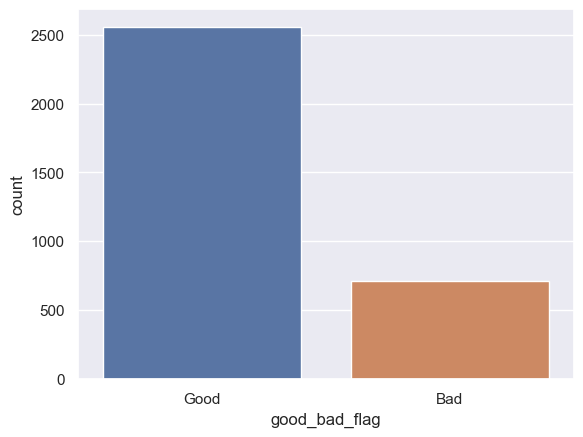

In [4]:
sns.countplot(x='good_bad_flag',data=data)

In [7]:
data.groupby('good_bad_flag').agg({'customerid':'nunique'})

,customerid
good_bad_flag,
Bad,713
Good,2556


### From the above data we have an imbalanced dataset.

# Qn How are the numerical columns distributed?

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_status_clients,4334.0000,2.0598,1.8556,0.0000,1.0000,1.0000,3.0000,6.0000
level_of_education_clients,4334.0000,3.5404,1.2290,0.0000,4.0000,4.0000,4.0000,4.0000
No_of_prevloans,3264.0000,4.1890,3.6680,1.0000,1.0000,3.0000,6.0000,26.0000
Total_amount_borrowed,3264.0000,69412.6838,89963.6953,5000.0000,10000.0000,30000.0000,90000.0000,770000.0000
Total_amount_due,3264.0000,82316.9690,103488.7011,5750.0000,13000.0000,36000.0000,109600.0000,866300.0000
Average_termdays,3264.0000,25.3619,6.8688,15.0000,20.0000,27.8571,30.0000,60.0000
systemloanid,3269.0000,301980730.9437,13449.6206,301958485.0000,301968853.0000,301979426.0000,301993368.0000,302004050.0000
loannumber,3269.0000,5.1897,3.6672,2.0000,2.0000,4.0000,7.0000,27.0000
loanamount,3269.0000,17837.2591,10742.8981,10000.0000,10000.0000,10000.0000,20000.0000,60000.0000
totaldue,3269.0000,21287.0681,11929.0027,10000.0000,13000.0000,13000.0000,24500.0000,68100.0000


## How is data distributed among the differnt colums?

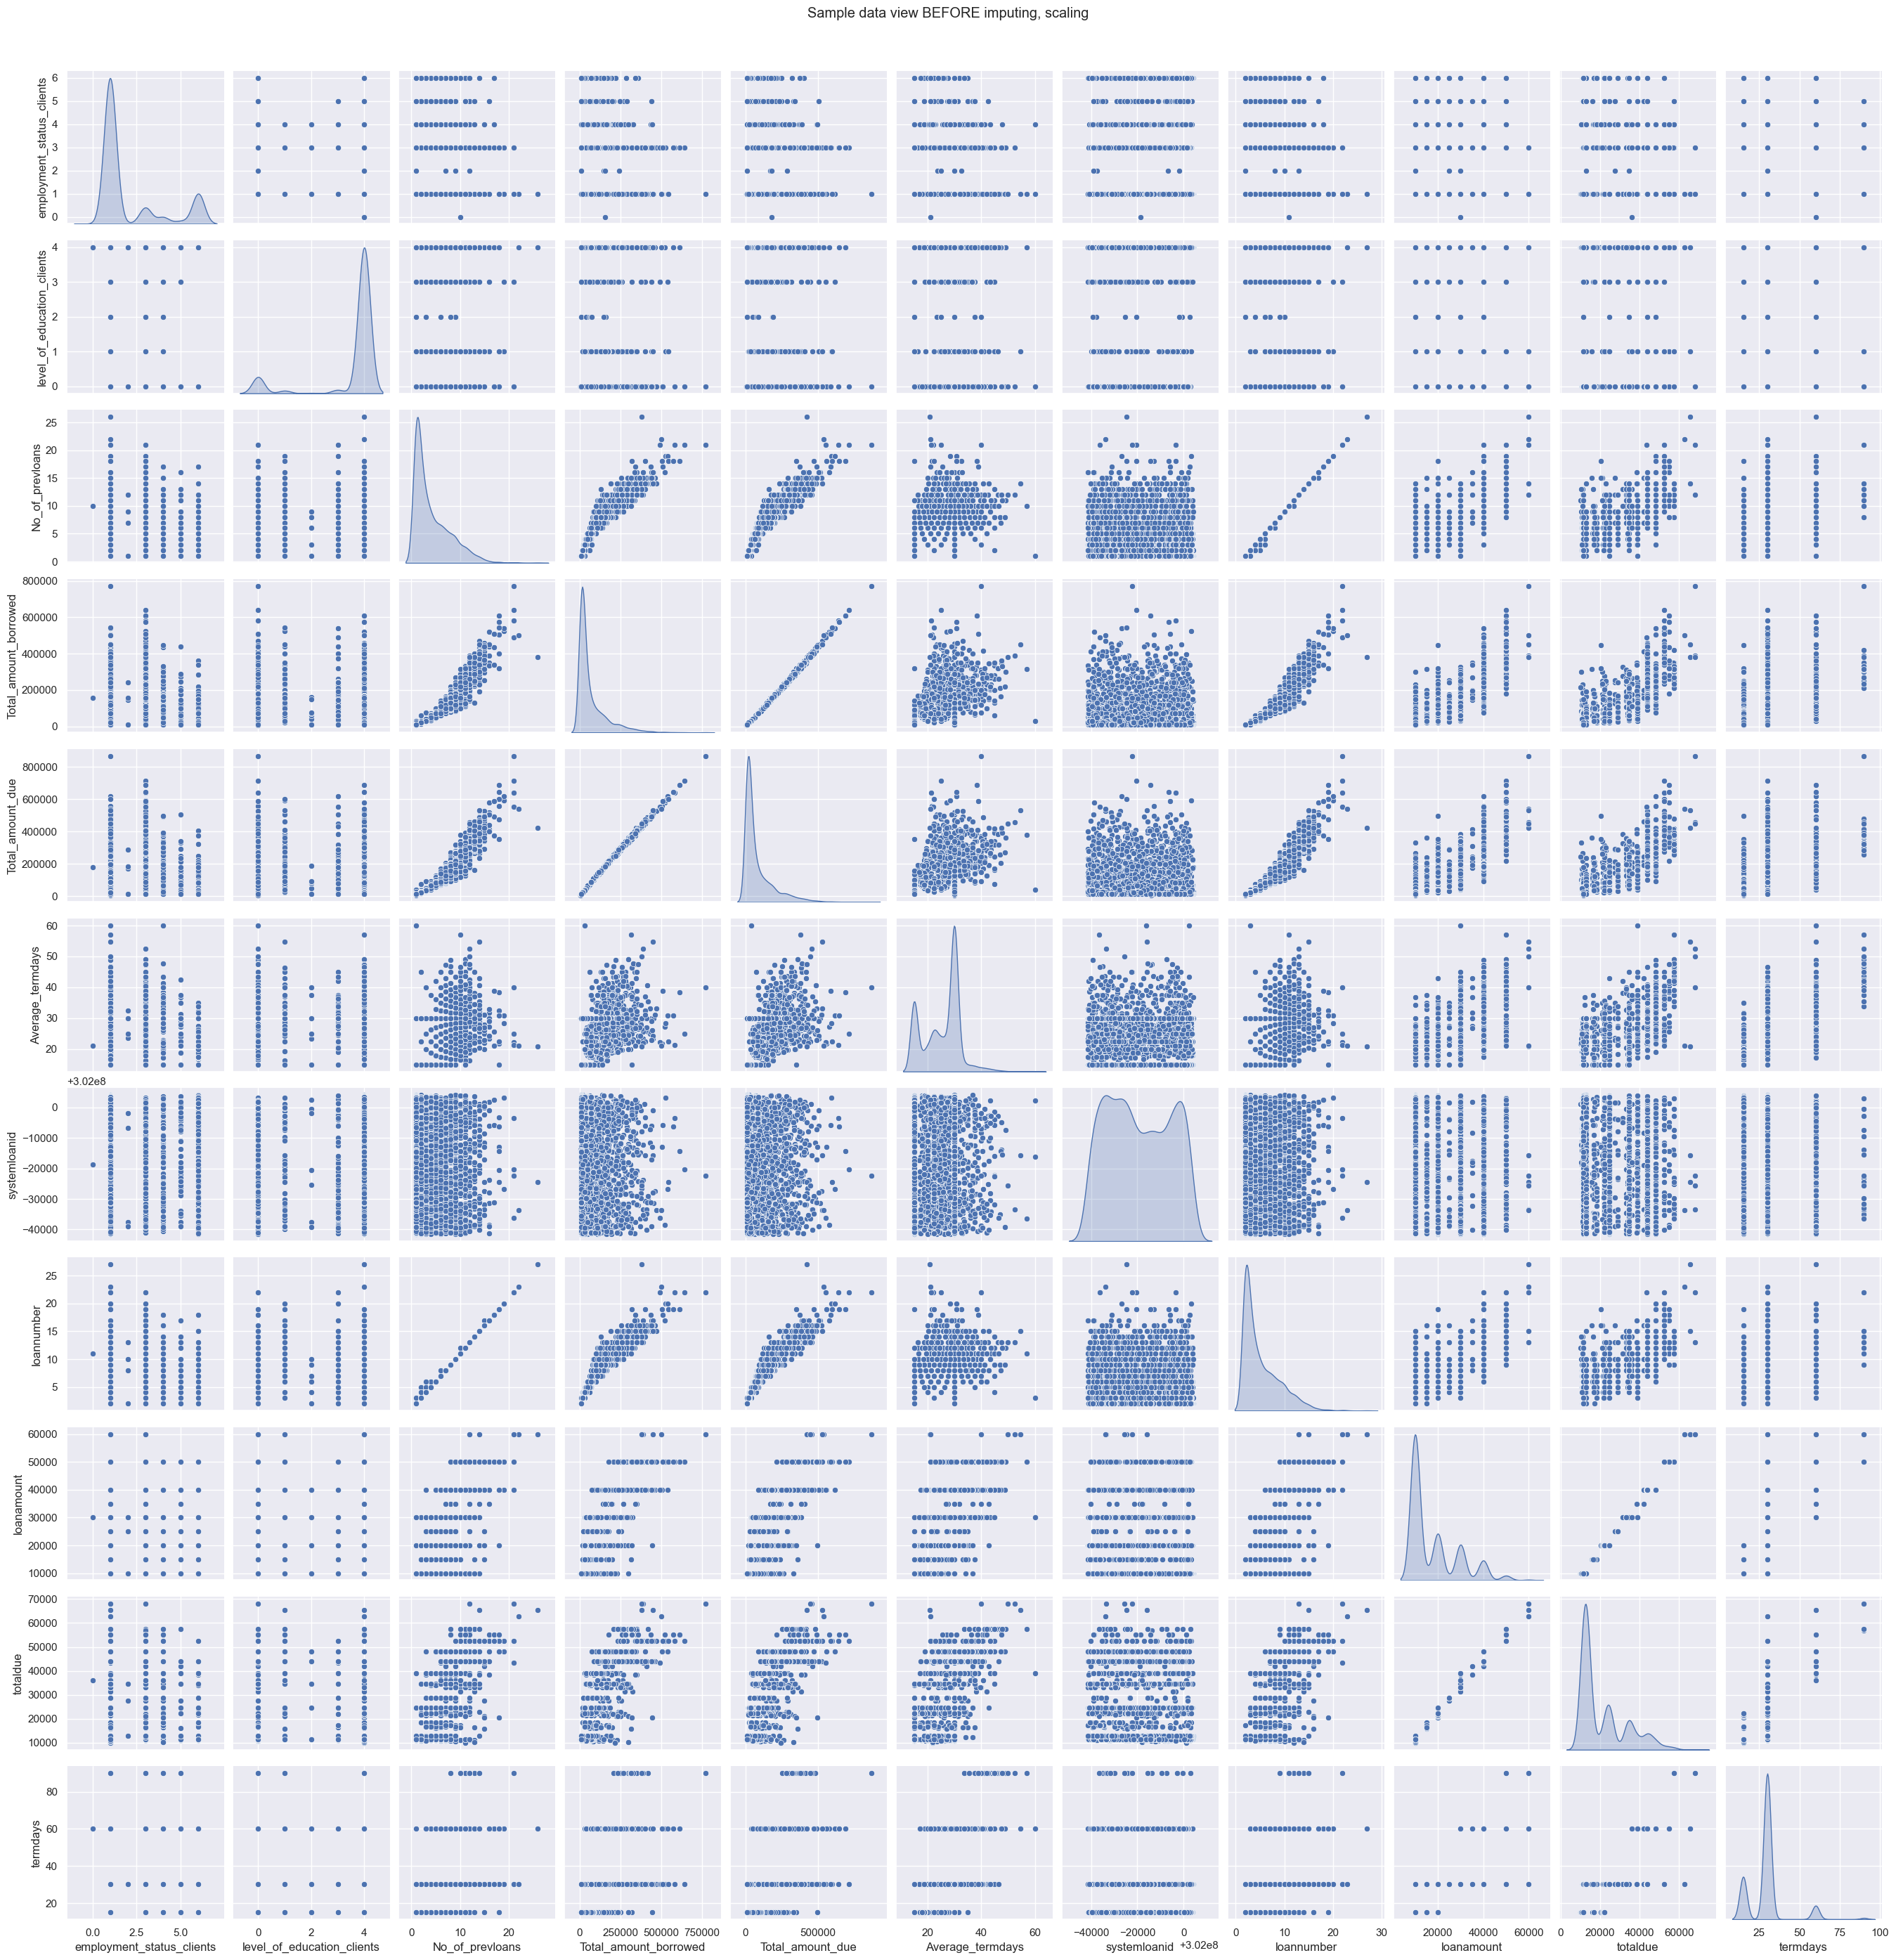

In [14]:
pr1plt = sns.pairplot(data.iloc[:, :20], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()